#### **Import Library**

In [ ]:
import Augmentor

import numpy as np
import cv2, glob, random
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#### **Dataset Preparation**

###### **Augmentation Data**

In [ ]:
def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=12, max_right_rotation=12)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

perbanyak("shoes-dataset/0_Sneakers", 3000)
perbanyak("shoes-dataset/1_FlatShoes", 3000)
perbanyak("shoes-dataset/2_SlipOn", 3000)
perbanyak("shoes-dataset/3_RunningShoes", 3000)
perbanyak("shoes-dataset/4_Sandals", 3000)
perbanyak("shoes-dataset/5_KittenHeels", 3000)

###### **Split Dataset**

In [ ]:
x = []
y = []

for alamat_gambar in glob.glob("shoes-dataset/0_Sneakers/*.jpeg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(0)

for alamat_gambar in glob.glob("shoes-dataset/1_FlatShoes/*.jpeg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(1)

for alamat_gambar in glob.glob("shoes-dataset/2_SlipOn/*.jpeg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(2)

for alamat_gambar in glob.glob("shoes-dataset/3_RunningShoes/*.jpeg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(3)

for alamat_gambar in glob.glob("shoes-dataset/4_Sandals/*.jpeg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(4)

for alamat_gambar in glob.glob("shoes-dataset/5_KittenHeels/*.jpeg"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (64, 64))/255
  x.append(gambar)
  y.append(5)

z = list(zip(x, y))

random.shuffle(z)

x, y = zip(*z)

x = np.asarray(x)
y = np.asarray(y)

#### **Model**

###### **Preparing the Model**

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(22, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

###### **Model Training**

In [ ]:
history = model.fit(x, y, batch_size=1, epochs=10, validation_split=0.1)

print(history.history.keys())

Epoch 1/10
17010/17010 [==============================] - 72s 4ms/step - loss: 1.3352 - accuracy: 0.4644 - val_loss: 0.8138 - val_accuracy: 0.7069
Epoch 2/10
17010/17010 [==============================] - 64s 4ms/step - loss: 0.6106 - accuracy: 0.7857 - val_loss: 0.4329 - val_accuracy: 0.8492
Epoch 3/10
17010/17010 [==============================] - 63s 4ms/step - loss: 0.3564 - accuracy: 0.8822 - val_loss: 0.3543 - val_accuracy: 0.8905
Epoch 4/10
17010/17010 [==============================] - 64s 4ms/step - loss: 0.2653 - accuracy: 0.9142 - val_loss: 0.3083 - val_accuracy: 0.9074
Epoch 5/10
17010/17010 [==============================] - 64s 4ms/step - loss: 0.2216 - accuracy: 0.9317 - val_loss: 0.3477 - val_accuracy: 0.8995
Epoch 6/10
17010/17010 [==============================] - 64s 4ms/step - loss: 0.1981 - accuracy: 0.9412 - val_loss: 0.2326 - val_accuracy: 0.9317
Epoch 7/10
17010/17010 [==============================] - 62s 4ms/step - loss: 0.1900 - accuracy: 0.9435 - val_loss: 0

###### **Model Visualization**

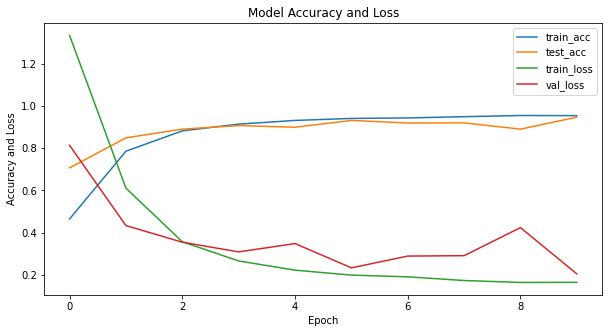

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy and Loss')

plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')

plt.legend(['train_acc', 'test_acc', 'train_loss', 'val_loss'], loc='upper right')

plt.show()

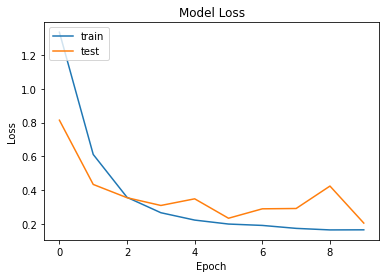

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

###### **Save Model**

In [ ]:
model.save_weights('types-shoes-model.h5')

###### **Load Model**

In [ ]:
model.load_weights("types-shoes-model.h5")

#### **Testing**

In [ ]:
kamus = {0: "Sneakers", 1: "Flat Shoes", 2: "Slip On", 3: "Running Shoes", 4: "Sandals", 5: "Kitten Heels"}

x_test = []

ini = cv2.resize(cv2.imread("image-test/0.jpeg"), (64, 64))/255
x_test.append(ini)

ini = cv2.resize(cv2.imread("image-test/1.jpeg"), (64, 64))/255
x_test.append(ini)

ini = cv2.resize(cv2.imread("image-test/2.jpeg"), (64, 64))/255
x_test.append(ini)

ini = cv2.resize(cv2.imread("image-test/3.jpeg"), (64, 64))/255
x_test.append(ini)

ini = cv2.resize(cv2.imread("image-test/4.jpeg"), (64, 64))/255
x_test.append(ini)

ini = cv2.resize(cv2.imread("image-test/5.jpeg"), (64, 64))/255
x_test.append(ini)

x_test = np.asarray(x_test)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

[kamus[_] for _ in y_pred]

1/1 [==============================] - 0s 384ms/step


['Sneakers',
 'Flat Shoes',
 'Slip On',
 'Running Shoes',
 'Sepatu Sandal',
 'Kitten Heels']

In [ ]:
x_test2 = []

ini = cv2.resize(cv2.imread("image-test/test.jpeg"), (64, 64))/255
x_test2.append(ini)

x_test2 = np.asarray(x_test2)

y_pred2 = model.predict(x_test2)
y_pred2 = np.argmax(y_pred2, axis=1)

[kamus[_] for _ in y_pred2]

1/1 [==============================] - 0s 20ms/step


['Sepatu Sandal']

In [ ]:
x_test2 = []

ini = cv2.resize(cv2.imread("image-test/images.jpeg"), (64, 64))/255
x_test2.append(ini)

x_test2 = np.asarray(x_test2)

y_pred2 = model.predict(x_test2)
y_pred2 = np.argmax(y_pred2, axis=1)

[kamus[_] for _ in y_pred2]

1/1 [==============================] - 0s 26ms/step


['Sneakers']